# NSL Notebook 04

## Exercise 04.1

Importing `restart-solid.out` and plot it, to visualize inititial oscillation, after restart from previous simulation

In [1]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

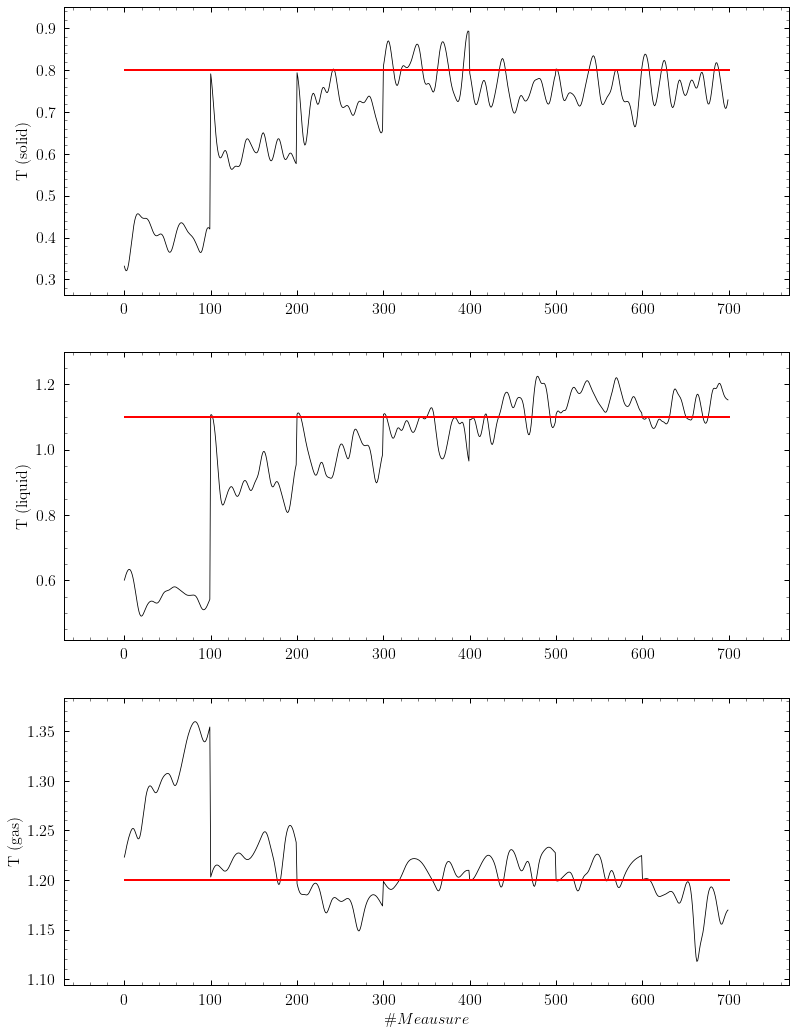

In [2]:
df = dict()
yy = dict()
tt = {"solid": 0.8, "liquid": 1.1, "gas": 1.2}

# load equilibrium oscillation to reach temperature
for state in ["solid", "liquid", "gas"]:
    df[state] = pd.read_csv(f"equil-{state}.out", header=None, names=[state])
    yy[state] = np.ones(df[state].size) * tt[state]

xx = np.arange(1, df["solid"].size+1, 1)

fig, ax = plt.subplots(3, 1, figsize=(13,18));

for ix, state in enumerate(["solid", "liquid", "gas"]):
    df[state][state].plot.line(c='k', lw=0.8, ax=ax[ix]);
    ax[ix].plot(xx, yy[state], 'r-', lw=2);
    ax[ix].set_ylabel(f"T ({state})");
    
ax[2].set_xlabel("$\# Meausure $");

## Exercise 04.2 04.3

Importing `*-solid-blk.csv` `*-liquid-blk.csv` `*-gas-blk.csv` and plot using SI

In [3]:
df = dict()
ee = 120 * 1.3806488e-23 * (1.602176565e-19)**-1 * 10**3 # meV energy
SI = {'T': 120, 'K': ee, 'V': ee, 'E': ee}

for state in ["solid", "liquid", "gas"]:
    df[state] = dict()
    for ch in "TKVE":
        df[state][ch] = pd.read_csv(f"{ch}-{state}-blk.csv", header=None, names=['v','e'])
        df[state][ch] = df[state][ch] * SI[ch]

### Solid Argon

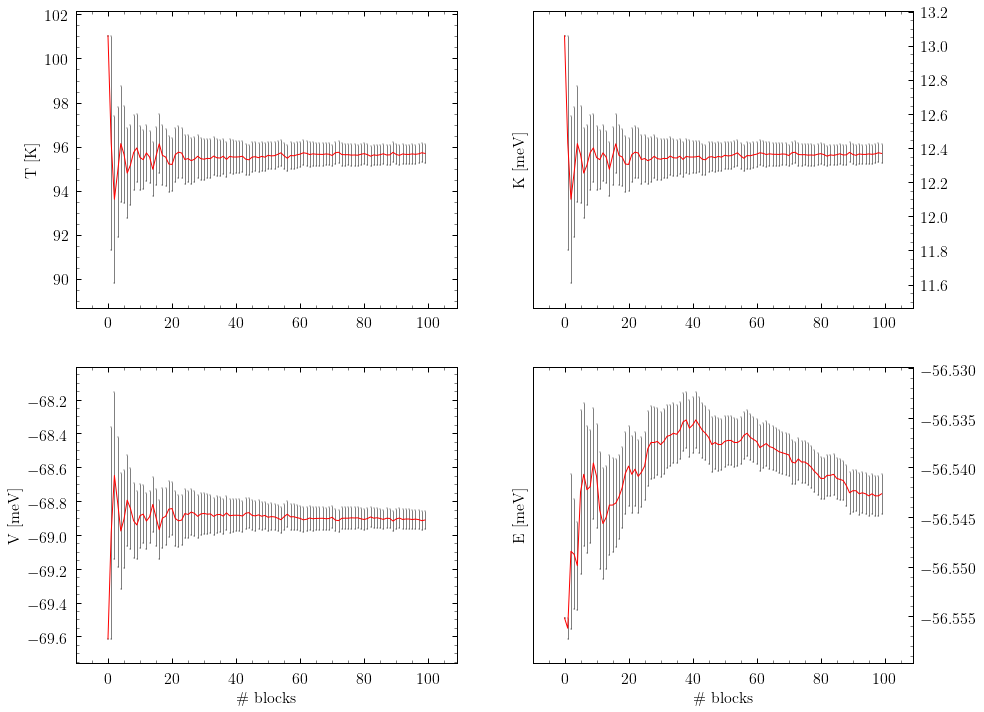

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["solid"][ch]['v'].plot.line(yerr=df["solid"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(f"{ch} [K]") if (ix == 0) else ax[ix].set_ylabel(f"{ch}  [meV]")
    ax[ix].yaxis.tick_right() if (ix == 1 or ix == 3) else 0
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0

### Liquid Argon

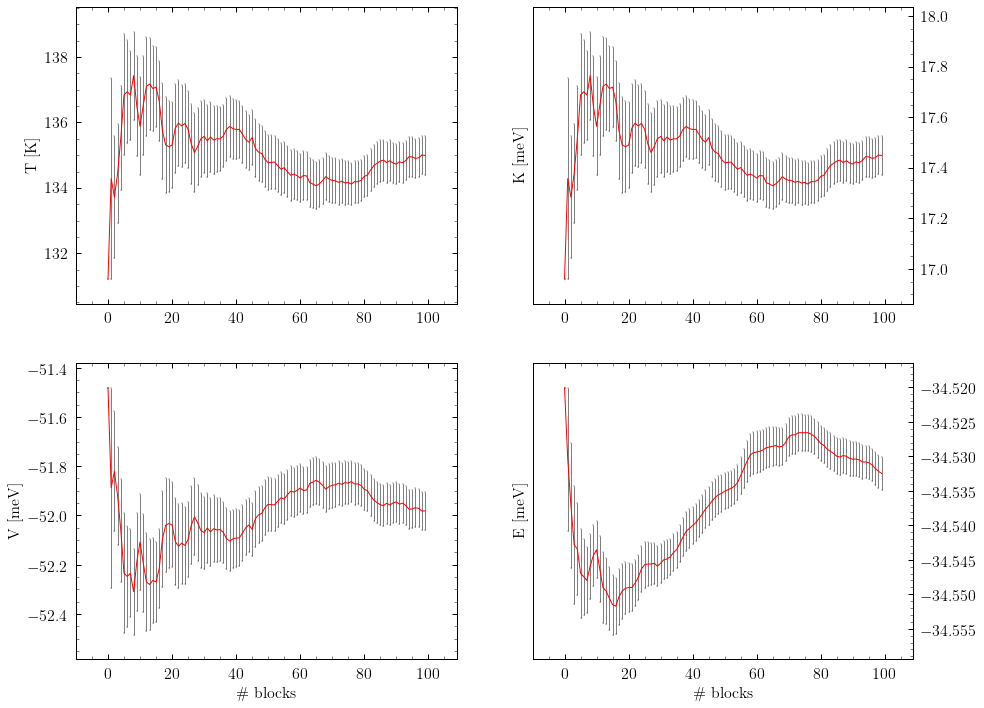

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["liquid"][ch]['v'].plot.line(yerr=df["liquid"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(f"{ch} [K]") if (ix == 0) else ax[ix].set_ylabel(f"{ch}  [meV]")
    ax[ix].yaxis.tick_right() if (ix == 1 or ix == 3) else 0
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0

### Gas Argon

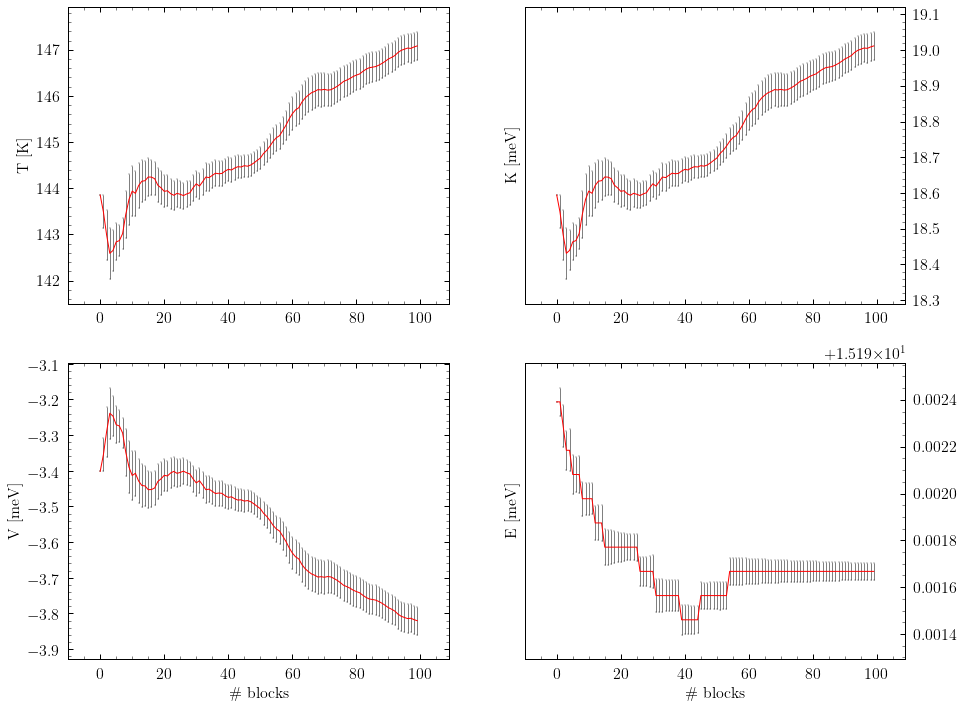

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15,12));

ax = np.asarray(ax)
ax.shape = (1,4)
ax = ax[0]

for ix, ch in enumerate("TKVE"):
    df["gas"][ch]['v'].plot.line(yerr=df["gas"][ch]['e'], color='r', ecolor='gray', capthick=0.3, ax=ax[ix]);
    ax[ix].set_ylabel(f"{ch} [K]") if (ix == 0) else ax[ix].set_ylabel(f"{ch}  [meV]")
    ax[ix].yaxis.tick_right() if (ix == 1 or ix == 3) else 0
    ax[ix].set_xlabel('\# blocks') if (ix == 2 or ix == 3) else 0